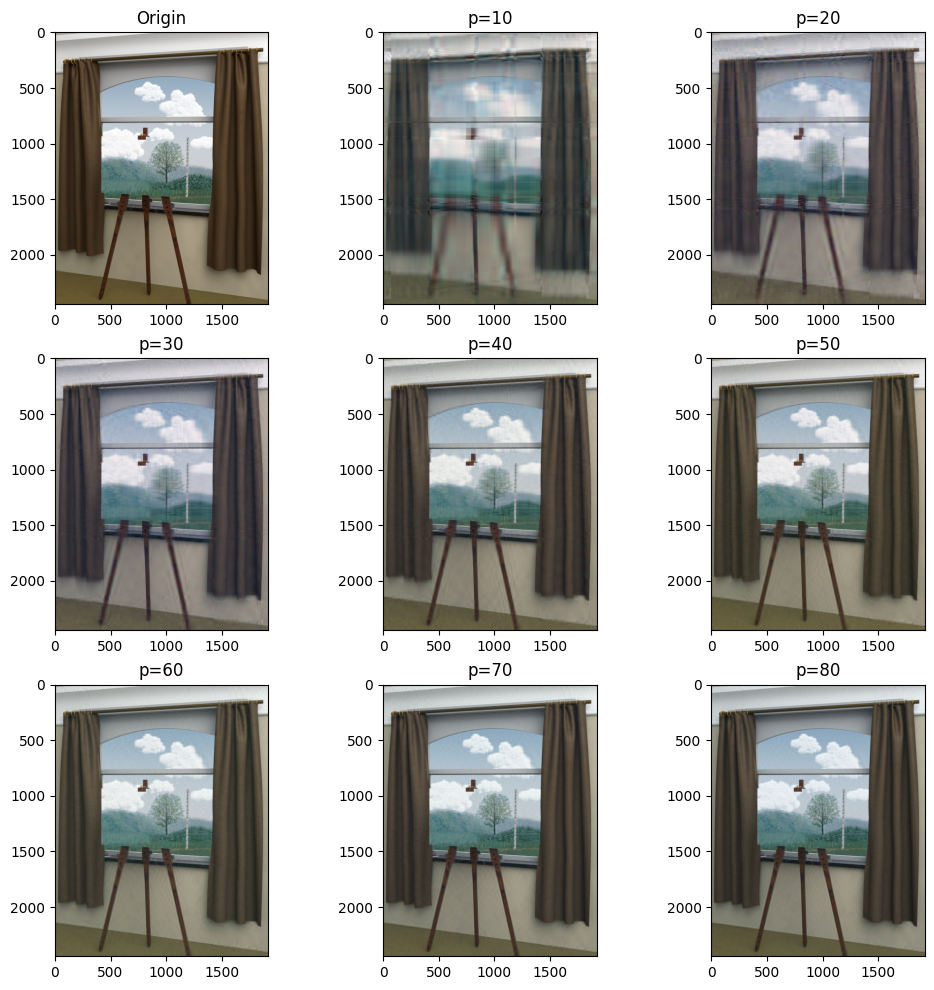

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


def color_img_compression_svd(original_img, rank):
    # Initialization of Image_Compressed
    img_compressed = np.zeros(original_img.shape)

    # Processing SVD Compression in 3 Channels(RGB)
    for channel in range(3):
        u, sigma, v = np.linalg.svd(img[:, :, channel])  # Doing SVD by numpy
        sigma = sorted(sigma, reverse=True)  # Sort the sigma from high value to low value

        # Truncate the original sigma to low rank
        low_rank_sigma_matrix = np.zeros(shape=(rank, rank), dtype=float)
        for rank_index in range(rank):
            low_rank_sigma_matrix[rank_index, rank_index] = sigma[rank_index]

        # Get the Compressed Image by Recomposition
        img_compressed[:, :, channel] = u[:, 0:rank].dot(low_rank_sigma_matrix).dot(v[0:rank, :])

    # Normalization of RGB Channel
    for channel in range(3):
        max_val = np.max(img_compressed[:, :, channel])
        min_val = np.min(img_compressed[:, :, channel])
        img_compressed[:, :, channel] = (img_compressed[:, :, channel] - min_val) / (max_val - min_val)
    img_compressed = np.round(img_compressed * 255).astype("uint8")

    return img_compressed


if __name__ == '__main__':
    plt.figure(figsize=(12, 12))
    img = plt.imread("./the human condition.jpg")
    f_origin = plt.subplot(331)
    f_origin.imshow(img)
    f_origin.set_title("Origin")

    for i in range(8):
        compressed_rank = 10*(i+1)
        img_com = color_img_compression_svd(img, compressed_rank)
        f_compressed = plt.subplot(3, 3, i+2)
        f_compressed.set_title("p=" + str(compressed_rank))
        f_compressed.imshow(img_com)

    plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from skimage.metrics import mean_squared_error, structural_similarity as ssim
import os

def calculate_metrics(original, compressed):
    mse = np.mean((original - compressed) ** 2)
    psnr = 20 * np.log10(255 / np.sqrt(mse))
    _ssim = ssim(original, compressed, multichannel=True)
    return mse, psnr, _ssim

def save_image(image, path):
    Image.fromarray(image).save(path, quality=85, optimize=True)

def file_size(path):
    """ Return the size of the file at the given path in bytes. """
    return os.path.getsize(path)

if __name__ == '__main__':
    iters = 8
    mse, psnr, _ssim, size, ranks = [0] * iters, [0] * iters, [0] * iters, [0] * iters, [0] * iters
    ranks = [10 * (i + 1) for i in range(iters)]
    image_paths = ['./fallen angel.jpg', './Impression Sunrise.jpg',
                   './Juan_Legua by Juan Gris.jpg', './Katedrála by František Kupka.jpg', './Nighthawks.jpg',
                   './Northern_River.jpg', './metamorphosis of narcissus.jpg', './mont saint victorie.jpg',
                   './oriental woman.jpg', 'pieta.jpg']
    for image_path in image_paths:
      compressed_image_path = 'compressed_image.jpeg'  # Path to save compressed image

      for i in range(iters):
          compressed_rank = 10*(i+1)
          img_com = color_img_compression_svd(img, compressed_rank)
          save_image(img_com, compressed_image_path)
          original_size = file_size(image_path)
          compressed_size = file_size(compressed_image_path)
          a, b, c = calculate_metrics(img, img_com)
          mse[i] += a
          psnr[i] += b
          _ssim[i] += c
          size[i] += compressed_size / original_size

    mse = [i / iters for i in mse]
    psnr = [i / iters for i in psnr]
    _ssim = [i / iters for i in _ssim]
    size = [i / iters for i in size]


<ipython-input-34-41d87cc58c31>:35: FutureWarning: `multichannel` is a deprecated argument name for `structural_similarity`. It will be removed in version 1.0. Please use `channel_axis` instead.
  _ssim = ssim(original, compressed, multichannel=True)


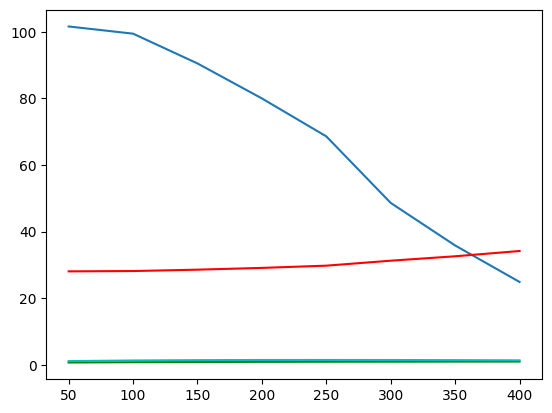

In [ ]:
plt.plot(ranks, mse)
plt.plot(ranks, psnr, 'r')
plt.plot(ranks, _ssim, 'g')
plt.plot(ranks, size, 'c')
plt.show()

In [ ]:
size

[0.5534425458229236,
 0.6707108183964523,
 0.7589963949550464,
 0.8126999591782611,
 0.8572054562070605,
 0.9016486126695392,
 0.9392229721883146,
 0.9620452867859174]

Text(0, 0.5, 'Compression Size Ratio')

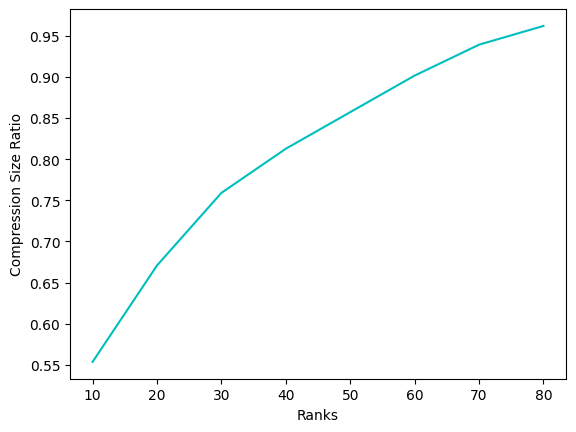

In [ ]:
plt.plot(ranks, size, 'c')
plt.xlabel("Ranks")
plt.ylabel('Compression Size Ratio')

In [ ]:
psnr

[34.99609767858199,
 35.06599796429448,
 35.22678640689967,
 35.140534098343316,
 35.218527867158784,
 35.25025044981537,
 35.32443881856779,
 35.17026202293372]

In [ ]:
_ssim

[0.5811616484587967,
 0.627638158650976,
 0.6593825607705196,
 0.6869898733877654,
 0.7155394669476793,
 0.7480143390248211,
 0.7712316294058864,
 0.7938113277479624]

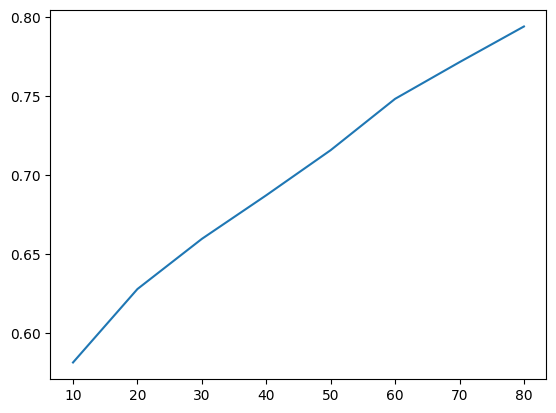

In [ ]:
plt.plot(ranks, _ssim)

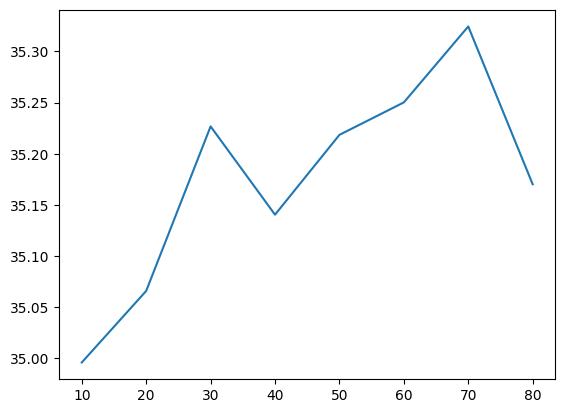

In [ ]:
plt.plot(ranks, psnr)